### Importação dos dados



In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [31]:
lojas = [loja1, loja2, loja3, loja4]
faturamento = 0
fat=[]

for i, df in enumerate(lojas):
  faturamento_loja =  df['Preço'].sum()
  faturamento += faturamento_loja
  fat.append(faturamento_loja)
  print(f'O faturamento da loja {i+1}, foi de: {faturamento_loja: ,.2f}')
print(f'Faturamento de todas as lojas: R${faturamento:,.2f}')


O faturamento da loja 1, foi de:  1,534,509.12
O faturamento da loja 2, foi de:  1,488,459.06
O faturamento da loja 3, foi de:  1,464,025.03
O faturamento da loja 4, foi de:  1,384,497.58
Faturamento de todas as lojas: R$5,871,490.79


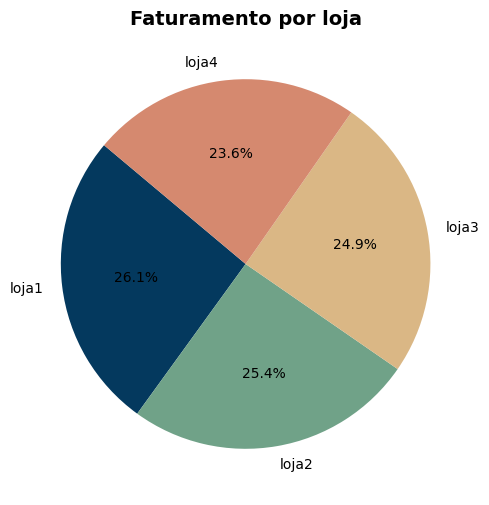

In [32]:
nome_loja = ['loja1', 'loja2', 'loja3', 'loja4']
cores=["#04395E", "#70A288", "#DAB785", "#D5896F"]
plt.figure(figsize=(7,6))
plt.pie(fat, labels=nome_loja, autopct='%1.1f%%', colors=cores, startangle=140)
plt.title('Faturamento por loja', fontsize=14, fontweight='bold')
plt.show()

# 2. Vendas por Categoria


In [33]:
lojas = [loja1, loja2, loja3, loja4]
for i, loja in enumerate(lojas, start=1):
    loja = loja.dropna(subset=['Categoria do Produto'])
    loja['Preço'] = loja['Preço'].fillna(0)
    loja['Preço'] = loja['Preço'].astype(float)
    vendas_categoria=loja.groupby('Categoria do Produto') ['Preço'].sum()

    print(f'Vendas por categoria da loja {i}: \n {vendas_categoria}\n \n')

Vendas por categoria da loja 1: 
 Categoria do Produto
brinquedos                23993.78
eletrodomesticos         484913.36
eletronicos              572659.23
esporte e lazer           52387.55
instrumentos musicais    121731.69
livros                    11713.92
moveis                   250178.11
utilidades domesticas     16931.48
Name: Preço, dtype: float64
 

Vendas por categoria da loja 2: 
 Categoria do Produto
brinquedos                21262.21
eletrodomesticos         464758.13
eletronicos              547773.71
esporte e lazer           46326.09
instrumentos musicais    139987.03
livros                    13454.35
moveis                   235234.68
utilidades domesticas     19662.86
Name: Preço, dtype: float64
 

Vendas por categoria da loja 3: 
 Categoria do Produto
brinquedos                25869.20
eletrodomesticos         438984.89
eletronicos              547699.92
esporte e lazer           47456.10
instrumentos musicais    103174.45
livros                    12664.70
mov

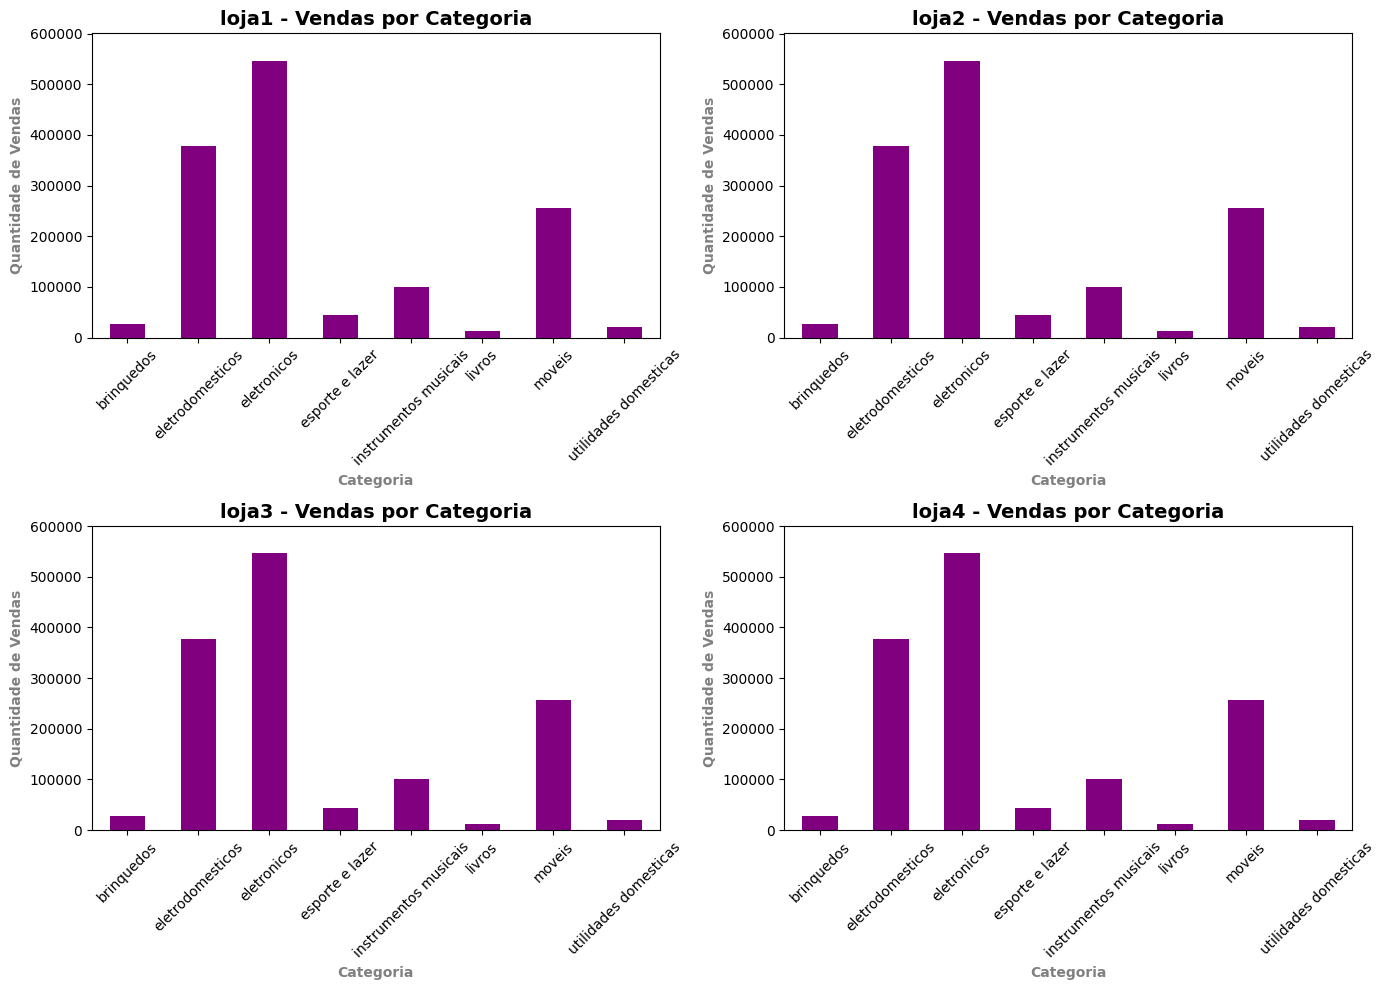

In [46]:
fig, grafico = plt.subplots(2,2, figsize=(14,10))
axs = grafico.flatten()

for i , (loja, nome) in enumerate(zip(lojas, nome_loja)):
  categoria = vendas_categoria
  ax = axs[i]
  categoria.plot(kind='bar', color='purple', ax=ax)
  ax.set_ylim(0, categoria.max() * 1.1)
  ax.set_title(f'{nome} - Vendas por Categoria', fontsize= 14, fontweight='bold')
  ax.set_xlabel('Categoria', fontweight='bold', color='gray')
  ax.set_ylabel('Quantidade de Vendas', fontweight='bold', color='gray')
  ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

In [35]:
def calcula_media(soma, quantidade):
    return soma / quantidade

lojas = [loja1, loja2, loja3, loja4]
medias=[]

for i, loja in enumerate(lojas):
    soma = loja['Avaliação da compra'].sum()
    quantidade = len(loja['Avaliação da compra'])
    media = calcula_media(soma, quantidade)
    medias.append(float(media))
    print(f'Média da avaliação da loja {i+1}: {media: .2f}')


Média da avaliação da loja 1:  3.98
Média da avaliação da loja 2:  4.04
Média da avaliação da loja 3:  4.05
Média da avaliação da loja 4:  4.00


<function matplotlib.pyplot.show(close=None, block=None)>

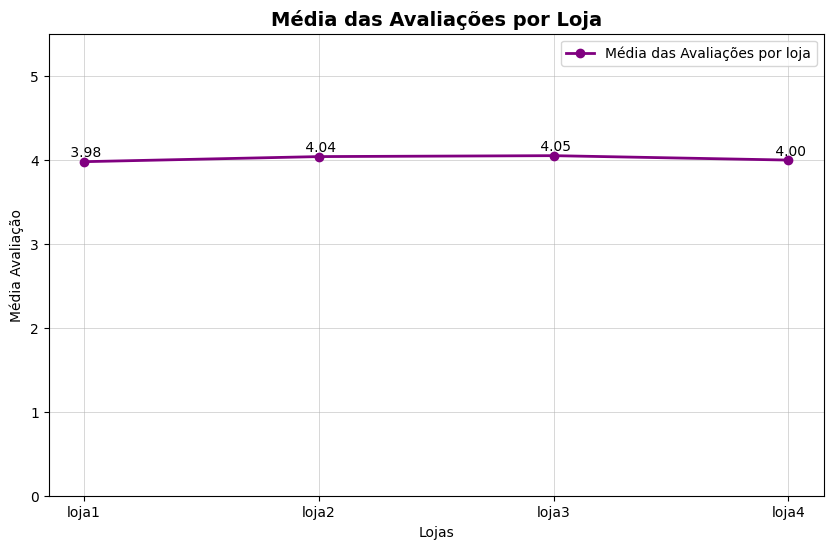

In [36]:
nome_loja = ['loja1', 'loja2', 'loja3', 'loja4']
cor = ["#BE39D5", "#76DBBB", "#4DC139", "#606B0A"]


plt.figure(figsize=(10,6))
plt.plot(nome_loja, medias, marker= 'o', color='purple', linewidth=2, label='Média das Avaliações por loja')
for i, valor in enumerate(medias):
  plt.text(i, valor+0.06, f'{valor: .2f}', ha = 'center', fontsize=10)
plt.title('Média das Avaliações por Loja', fontsize=14, fontweight='bold')
plt.xlabel('Lojas')
plt.ylabel('Média Avaliação')
plt.ylim(0, 5.5)
plt.grid(True, linewidth=0.5, alpha=0.7)
plt.legend()
plt.show



# 4. Produtos Mais e Menos Vendidos

In [37]:
lojas = [loja1, loja2, loja3, loja4]
for i, loja in enumerate(lojas, start=1):
    contagem = loja['Produto'].value_counts()
    mais_vendidos = contagem.sort_values(ascending=False)
    menos_vendidos= contagem.sort_values(ascending=True)
    print(f'Produtos menos vendidos:\n loja {i} {menos_vendidos.head()}')
    print('******************** \n')

    print(f'Podutos mais vendidos: \n loja {i} {mais_vendidos.head()}')
    print('********************\n')


Produtos menos vendidos:
 loja 1 Produto
Headset              33
Celular ABXY         33
Panela de pressão    35
Pandeiro             36
Mochila              39
Name: count, dtype: int64
******************** 

Podutos mais vendidos: 
 loja 1 Produto
Micro-ondas           60
TV Led UHD 4K         60
Guarda roupas         60
Secadora de roupas    58
Cômoda                56
Name: count, dtype: int64
********************

Produtos menos vendidos:
 loja 2 Produto
Jogo de tabuleiro    32
Mesa de jantar       34
Impressora           34
Poltrona             35
Fone de ouvido       37
Name: count, dtype: int64
******************** 

Podutos mais vendidos: 
 loja 2 Produto
Iniciando em programação    65
Micro-ondas                 62
Bateria                     61
Violão                      58
Pandeiro                    58
Name: count, dtype: int64
********************

Produtos menos vendidos:
 loja 3 Produto
Blocos de montar    35
Micro-ondas         36
Jogo de copos       36
Mochila       

# 5. Frete Médio por Loja


In [40]:
lojas = [loja1, loja2, loja3, loja4]
frete_medio_graf= []

for i, df in enumerate(lojas, start=1):

    soma_frete = df['Frete'].sum()
    total_pedidos = df['Frete'].count()
    frete_medio = soma_frete / total_pedidos
    frete_medio_graf.append(frete_medio)
    print(f" Frete médio da Loja {i}: R$ {frete_medio:.2f}")

 Frete médio da Loja 1: R$ 34.69
 Frete médio da Loja 2: R$ 33.62
 Frete médio da Loja 3: R$ 33.07
 Frete médio da Loja 4: R$ 31.28


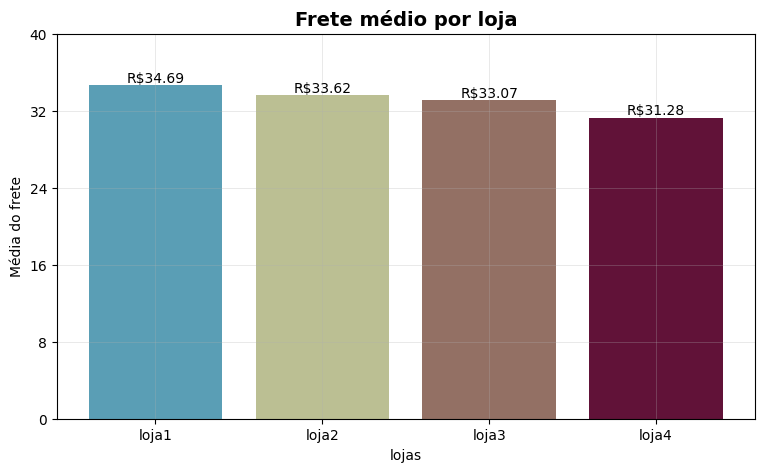

In [41]:
nome_loja = ['loja1', 'loja2', 'loja3', 'loja4']
barras = ["#5A9EB5", "#BBBF93", "#937064", "#611238"]

plt.figure(figsize=(9,5))
plt.bar(nome_loja, frete_medio_graf, color=barras)
for i, valor in enumerate(frete_medio_graf):
    plt.text(i, valor + 0.3, f'R${valor:.2f}', ha='center', fontsize=10)
plt.yticks(range(0, int(max(frete_medio_graf)) +9, 8))
plt.xlabel('lojas')
plt.ylabel('Média do frete')
plt.title('Frete médio por loja', fontweight='bold', fontsize= 14)
plt.grid(True, linewidth=0.5, alpha=0.4)
plt.show()